In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('../input/final.csv',index_col=False)
# df.FamilyIncome=(df.FamilyIncome-df.FamilyIncome.mean())/df.FamilyIncome.std()
X=df[['ASVAB','HighSchoolGrade']]
y=df.FamilyIncome

In [3]:
df

,ASVAB,FamilyIncome,HighSchoolGrade
0,45.070,50000,7.0
1,58.483,81000,5.0
2,27.978,150250,6.0
3,22.001,55000,3.0
4,3.585,14766,5.0
...,...,...,...
5015,18.599,38000,5.0
5016,12.716,30441,3.0
5017,27.785,33500,5.0
5018,96.478,40400,7.0


**Let's check for any obvious trends**

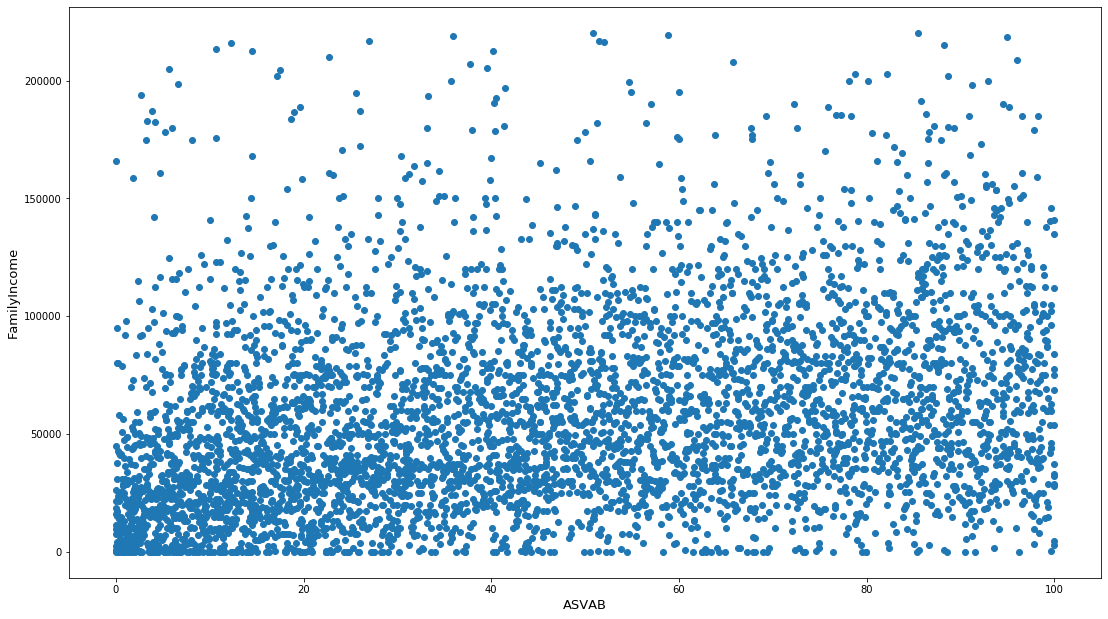

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x = df.ASVAB, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('ASVAB', fontsize=13)
plt.show()
plt.close()

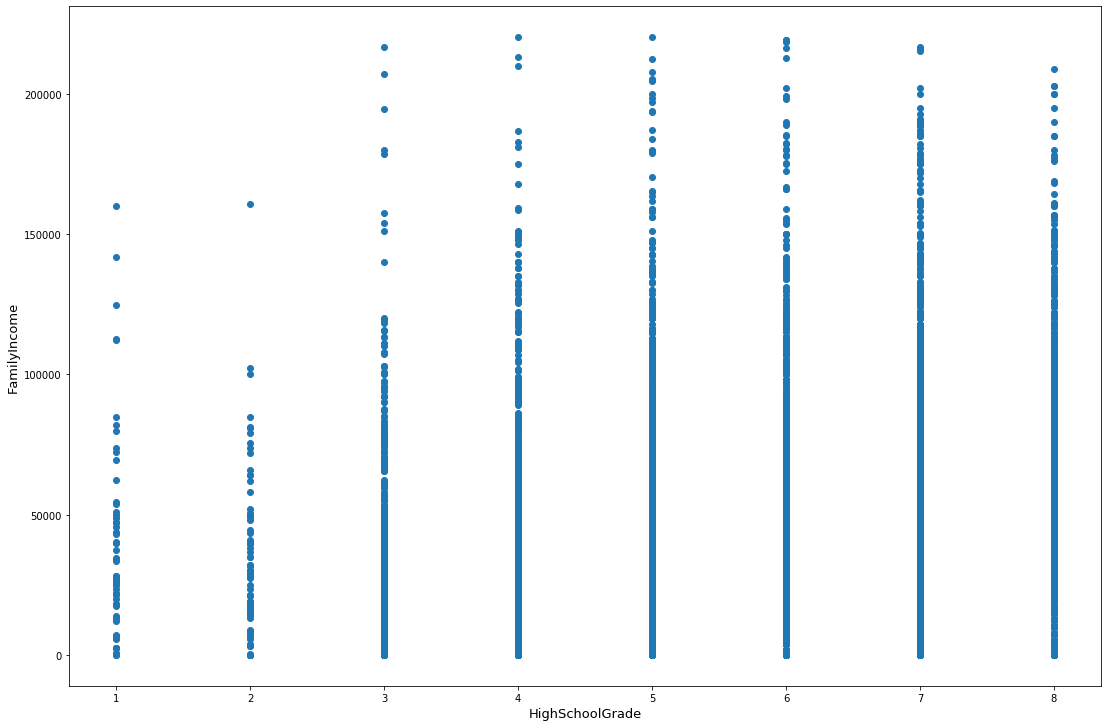

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(18.5, 12.5)

ax.scatter(x = df.HighSchoolGrade, y =df.FamilyIncome)
plt.ylabel('FamilyIncome', fontsize=13)
plt.xlabel('HighSchoolGrade', fontsize=13)
plt.show()
plt.close()

**From the graphs we can expect low correlations**

In [6]:
df.corr()

,ASVAB,FamilyIncome,HighSchoolGrade
ASVAB,1.000000,0.303217,0.473841
FamilyIncome,0.303217,1.000000,0.226380
HighSchoolGrade,0.473841,0.226380,1.000000


In [7]:
print(X.shape)
print(y.shape)


(5020, 2)
(5020,)


In [8]:
# checking the p values
import statsmodels.api as sm
X = sm.add_constant(X)

mod = sm.OLS( y,X)

res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           FamilyIncome   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     281.1
Date:                Wed, 26 Aug 2020   Prob (F-statistic):          1.98e-116
Time:                        11:39:51   Log-Likelihood:                -60169.
No. Observations:                5020   AIC:                         1.203e+05
Df Residuals:                    5017   BIC:                         1.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.583e+04   2026.530     

In [9]:
regressor = LinearRegression()  
regressor.fit(X, y)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
#To retrieve the intercept:
print(regressor.intercept_)
print(regressor.score(X, y))

                 Coefficient
const               0.000000
ASVAB             352.679752
HighSchoolGrade  2759.348803
25827.84370446937
0.100761010727623


**Let's try splitting the data**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:

print(X_train.shape)
print(y_train.shape)

regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train) #training the algorithm

(4016, 3)
(4016,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
coeff_df_2 = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  

print(coeff_df_2)
print(regressor2.intercept_)
print(regressor2.score(X_train, y_train))
print(regressor2.score(X_test, y_test))

                 Coefficient
const               0.000000
ASVAB             373.330043
HighSchoolGrade  2823.242196
24315.816408535356
0.11086363563228752
0.05659960066349012


In [13]:
y_pred = regressor2.predict(X_test)
y_pred_2 = regressor2.predict(X_train)

print(1-(((y_pred-y_test)**2).sum()/((y_test - y_test.mean()) ** 2).sum()))
print(1-(((y_pred_2-y_train)**2).sum()/((y_train - y_train.mean()) ** 2).sum()))

0.056599600663490124
0.11086363563228752


In [15]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29928.790105754637
Mean Squared Error: 1538071814.8352082
Root Mean Squared Error: 39218.258692032825


**Visualizing models**

In [16]:
from mpl_toolkits.mplot3d import Axes3D


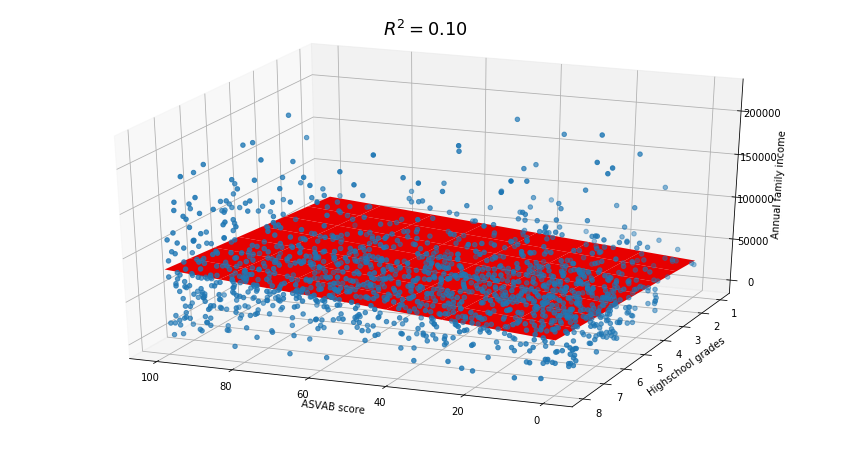

In [17]:
from random import random, seed
from matplotlib import cm


fig = plt.figure(figsize=(15, 8))
ax = fig.gca(projection='3d')               # to work in 3d

x_surf=np.linspace(0, 100, 8)                # generate a mesh
y_surf=np.linspace(1, 8, 8)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = 352.679752*x_surf+  2759.348803* y_surf+ 25827.84370446937        
ax.plot_surface(x_surf, y_surf, z_surf, color='r', label='Regression plain');   

r2=regressor.score(X, y)
points=df.sample(frac=0.3, random_state=1)
ax.scatter(points.ASVAB, points.HighSchoolGrade, points.FamilyIncome, label='Sample data');                     

ax.set_xlabel('ASVAB score')
ax.set_ylabel('Highschool grades')
ax.set_zlabel('Annual family income')
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

ax.view_init(elev=27, azim=112)


plt.show()
plt.close()